In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [3]:
d = pd.read_csv("nvda_stock_data.csv")

In [4]:
d.head()

,Date,Close,High,Low,Open,Volume
0,02-01-2020,5.972710,5.972710,5.893293,5.943831,237536000
1,03-01-2020,5.877111,5.920928,5.828067,5.852963,205384000
2,06-01-2020,5.901757,5.906985,5.757612,5.783752,262636000
3,07-01-2020,5.973209,6.019017,5.885078,5.930139,314856000
4,08-01-2020,5.984413,6.025740,5.928896,5.968977,277108000


In [5]:
d.shape

(1258, 6)

In [6]:
d.index = pd.to_datetime(d['Date'],format="%d-%m-%Y")

# drop The original date column
d = d.drop(['Date'], axis='columns')
d

,Close,High,Low,Open,Volume
Date,,,,,
2020-01-02,5.972710,5.972710,5.893293,5.943831,237536000
2020-01-03,5.877111,5.920928,5.828067,5.852963,205384000
2020-01-06,5.901757,5.906985,5.757612,5.783752,262636000
2020-01-07,5.973209,6.019017,5.885078,5.930139,314856000
2020-01-08,5.984413,6.025740,5.928896,5.968977,277108000
...,...,...,...,...,...
2024-12-24,140.220001,141.899994,138.649994,140.000000,105157000
2024-12-26,139.929993,140.850006,137.729996,139.699997,116205600
2024-12-27,137.009995,139.020004,134.710007,138.550003,170582600


In [7]:
d = d[["Close"]]

In [8]:
d["Target"] = d["Close"].shift(-1)

In [9]:
d.isnull().sum()

Close     0
Target    1
dtype: int64

In [11]:
d["Target"].fillna(d["Target"].mean(),inplace=True)
d.index = pd.to_datetime(d['Date'],format="%d-%m-%Y")

KeyError: 'Date'

In [12]:
d.dropna(inplace=True)
d

,Close,Target
Date,,
2020-01-02,5.972710,5.877111
2020-01-03,5.877111,5.901757
2020-01-06,5.901757,5.973209
2020-01-07,5.973209,5.984413
2020-01-08,5.984413,6.050136
...,...,...
2024-12-24,140.220001,139.929993
2024-12-26,139.929993,137.009995
2024-12-27,137.009995,137.490005


In [23]:
x = d[["Close"]]
y = d["Target"]

TRAIN TEST SPLIT

In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,shuffle = False)

TRAIN THE MODEL USING LINEAR REGRESSION

In [25]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [26]:
lr.score(x_train,y_train)*100, lr.score(x_test,y_test)*100

(99.61908493856525, 93.31375616582443)

In [27]:
LR_Pred = lr.predict(x)
d["LR_Pred"] = LR_Pred
d

,Close,Target,LR_Pred,SV_Pred
Date,,,,
2020-01-02,5.972710,5.877111,6.016120,6.011982
2020-01-03,5.877111,5.901757,5.920531,5.916384
2020-01-06,5.901757,5.973209,5.945174,5.941030
2020-01-07,5.973209,5.984413,6.016619,6.012482
2020-01-08,5.984413,6.050136,6.027822,6.023685
...,...,...,...,...
2024-12-24,140.220001,139.929993,140.250251,140.260083
2024-12-26,139.929993,137.009995,139.960271,139.970073
2024-12-27,137.009995,137.490005,137.040559,137.050057


TRAIN THE MODEL USING SVM

In [28]:
from sklearn.svm import SVR
sv = SVR(kernel="linear")
sv.fit(x_train,y_train)

SVR(kernel='linear')

In [29]:
sv.score(x_train,y_train)*100, sv.score(x_test,y_test)*100

(99.61907910739167, 93.31299904604617)

In [30]:
SV_Pred = sv.predict(x)
d["SV_Pred"] = SV_Pred
d

,Close,Target,LR_Pred,SV_Pred
Date,,,,
2020-01-02,5.972710,5.877111,6.016120,6.011982
2020-01-03,5.877111,5.901757,5.920531,5.916384
2020-01-06,5.901757,5.973209,5.945174,5.941030
2020-01-07,5.973209,5.984413,6.016619,6.012482
2020-01-08,5.984413,6.050136,6.027822,6.023685
...,...,...,...,...
2024-12-24,140.220001,139.929993,140.250251,140.260083
2024-12-26,139.929993,137.009995,139.960271,139.970073
2024-12-27,137.009995,137.490005,137.040559,137.050057


VISUALIZATION GRAPH

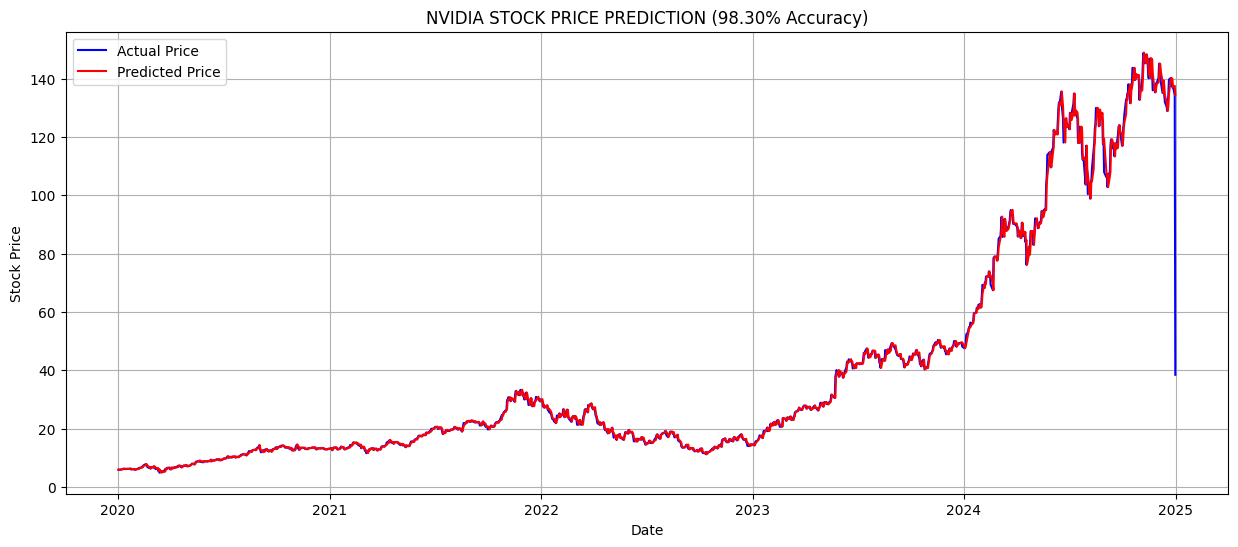

In [31]:
plt.figure(figsize=(15,6))
plt.plot(d.index,d["Target"],label="Actual Price",color="blue")
plt.plot(d.index,d["LR_Pred"],label="Predicted Price",color="red")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.title("NVIDIA STOCK PRICE PREDICTION (98.30% Accuracy)")
plt.legend()
plt.grid(True)
plt.show()